In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
)

%matplotlib inline

## Load N-Gram

In [22]:
all_ngram = glob('ngram_baseline/*.pkl')
compiled_ngram = []

for path in all_ngram:
    compiled_ngram.append(load_pickle(path))

In [24]:
compiled_ngram = pd.DataFrame(compiled_ngram)

In [33]:
ngram_grouped =  compiled_ngram.groupby(['representation', 'num_classes', 'train_size'])[['representation', 'num_classes', 'train_size', 'accuracy', 'f1_macro', 'f1_micro', 'kappa']].agg(['mean', 'std', sem])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_6960/2602483300.py:1: FutureWarning: ['representation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ngram_grouped =  compiled_ngram.groupby(['representation', 'num_classes', 'train_size'])[['representation', 'num_classes', 'train_size', 'accuracy', 'f1_macro', 'f1_micro', 'kappa']].agg(['mean', 'std', sem])


## Load results

In [3]:
all_out = glob("out/**/*.pkl")

In [4]:
all_out = [load_pickle(p) for p in all_out]

In [5]:
extracted_res = []

ohe_tanimoto_res = []
rxnfp_linear_res = []
rxnfp_rbf_res = []
drfp_linear_res = []
drfp_rbf_res = []

for out in all_out:
    res = {
        "train_size": out["train_size"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
        "num_classes": out["num_classes"],
        "one_hot": out["one_hot"],
    }

    res_ohe_tanimoto = {
        "frac_valid": out["baseline"]["metrics"]["ohe-tanimoto"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["ohe-tanimoto"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["ohe-tanimoto"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["ohe-tanimoto"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["ohe-tanimoto"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_rxnfp_linear = {
        "frac_valid": out["baseline"]["metrics"]["rxnfp-linear"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["rxnfp-linear"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["rxnfp-linear"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["rxnfp-linear"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["rxnfp-linear"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_rxnfp_rbf = {
        "frac_valid": out["baseline"]["metrics"]["rxnfp-rbf"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["rxnfp-rbf"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["rxnfp-rbf"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["rxnfp-rbf"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["rxnfp-rbf"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_drfp_rbf = {
        "frac_valid": out["baseline"]["metrics"]["drfp-rbf"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["drfp-rbf"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["drfp-rbf"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["drfp-rbf"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["drfp-rbf"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_drfp_linear = {
        "frac_valid": out["baseline"]["metrics"]["drfp-linear"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["drfp-linear"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["drfp-linear"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["drfp-linear"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["drfp-linear"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    extracted_res.append(res)

    ohe_tanimoto_res.append(res_ohe_tanimoto)

    rxnfp_linear_res.append(res_rxnfp_linear)

    rxnfp_rbf_res.append(res_rxnfp_rbf)

    drfp_linear_res.append(res_drfp_linear)

    drfp_rbf_res.append(res_drfp_rbf)

In [6]:
extracted_res = pd.DataFrame(extracted_res)
ohe_tanimoto_res = pd.DataFrame(ohe_tanimoto_res)
rxnfp_linear_res = pd.DataFrame(rxnfp_linear_res)
rxnfp_rbf_res = pd.DataFrame(rxnfp_rbf_res)
drfp_linear_res = pd.DataFrame(drfp_linear_res)
drfp_rbf_res = pd.DataFrame(drfp_rbf_res)

In [7]:
extracted_res

,train_size,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,one_hot
0,200,1.0,0.51,0.493042,0.51,0.387500,5,True
1,200,1.0,0.49,0.473261,0.49,0.362500,5,False
2,10,1.0,0.52,0.500000,0.52,0.040000,2,False
3,100,1.0,0.51,0.505016,0.51,0.387500,5,False
4,10,1.0,0.24,0.163893,0.24,0.050000,5,False
...,...,...,...,...,...,...,...,...
121,200,1.0,0.78,0.779205,0.78,0.560000,2,False
122,10,1.0,0.53,0.503748,0.53,0.060000,2,True
123,10,1.0,0.23,0.194477,0.23,0.037500,5,True
124,20,1.0,0.22,0.206299,0.22,0.025000,5,True


In [8]:
ohe_tanimoto_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.46,0.445952,0.46,0.3250,5,200
1,1.0,0.45,0.453844,0.45,0.3125,5,200
2,1.0,0.50,0.333333,0.50,0.0000,2,10
3,1.0,0.36,0.368581,0.36,0.2000,5,100
4,1.0,0.20,0.066667,0.20,0.0000,5,10
...,...,...,...,...,...,...,...
121,1.0,0.70,0.695617,0.70,0.4000,2,200
122,1.0,0.60,0.597424,0.60,0.2000,2,10
123,1.0,0.20,0.066667,0.20,0.0000,5,10
124,1.0,0.20,0.066667,0.20,0.0000,5,20


In [9]:
rxnfp_linear_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.26,0.249762,0.26,0.0750,5,200
1,1.0,0.37,0.373229,0.37,0.2125,5,200
2,1.0,0.50,0.333333,0.50,0.0000,2,10
3,1.0,0.46,0.463347,0.46,0.3250,5,100
4,1.0,0.20,0.066667,0.20,0.0000,5,10
...,...,...,...,...,...,...,...
121,1.0,0.79,0.788285,0.79,0.5800,2,200
122,1.0,0.50,0.333333,0.50,0.0000,2,10
123,1.0,0.20,0.066667,0.20,0.0000,5,10
124,1.0,0.20,0.066667,0.20,0.0000,5,20


In [10]:
rxnfp_rbf_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.26,0.230456,0.26,0.0750,5,200
1,1.0,0.30,0.293956,0.30,0.1250,5,200
2,1.0,0.50,0.333333,0.50,0.0000,2,10
3,1.0,0.34,0.309194,0.34,0.1750,5,100
4,1.0,0.31,0.309537,0.31,0.1375,5,10
...,...,...,...,...,...,...,...
121,1.0,0.79,0.788285,0.79,0.5800,2,200
122,1.0,0.50,0.333333,0.50,0.0000,2,10
123,1.0,0.20,0.066667,0.20,0.0000,5,10
124,1.0,0.17,0.145661,0.17,-0.0375,5,20


In [11]:
drfp_linear_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.34,0.346641,0.34,0.1750,5,200
1,1.0,0.44,0.442150,0.44,0.3000,5,200
2,1.0,0.50,0.333333,0.50,0.0000,2,10
3,1.0,0.43,0.433454,0.43,0.2875,5,100
4,1.0,0.30,0.304256,0.30,0.1250,5,10
...,...,...,...,...,...,...,...
121,1.0,0.76,0.755202,0.76,0.5200,2,200
122,1.0,0.50,0.333333,0.50,0.0000,2,10
123,1.0,0.20,0.066667,0.20,0.0000,5,10
124,1.0,0.20,0.066667,0.20,0.0000,5,20


In [12]:
drfp_rbf_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.41,0.407280,0.41,0.2625,5,200
1,1.0,0.45,0.455604,0.45,0.3125,5,200
2,1.0,0.50,0.333333,0.50,0.0000,2,10
3,1.0,0.46,0.460259,0.46,0.3250,5,100
4,1.0,0.20,0.066667,0.20,0.0000,5,10
...,...,...,...,...,...,...,...
121,1.0,0.74,0.736201,0.74,0.4800,2,200
122,1.0,0.50,0.333333,0.50,0.0000,2,10
123,1.0,0.20,0.066667,0.20,0.0000,5,10
124,1.0,0.20,0.066667,0.20,0.0000,5,20


In [13]:
grouped_extracted_res = extracted_res.groupby(["num_classes", "train_size", "one_hot"]).agg(
    ["mean", "std", sem]
)

grouped_ohe_tanimoto_res = ohe_tanimoto_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_rxnfp_linear_res = rxnfp_linear_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_rxnfp_rbf_res = rxnfp_rbf_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_drfp_linear_res = drfp_linear_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_drfp_rbf_res = drfp_rbf_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

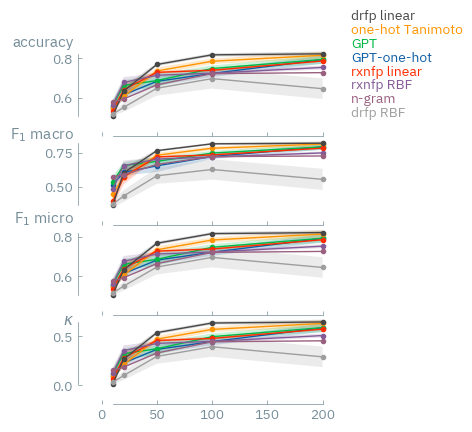

In [34]:
fig, ax = plt.subplots(
    4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
)

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_extracted_res.loc[2, :, True].index,
        grouped_extracted_res.loc[2, :, True][metric]["mean"],
        marker="o",
        label="GPT-one-hot",
    )
    ax[i].fill_between(
        grouped_extracted_res.loc[2, :, True].index,
        grouped_extracted_res.loc[2, :, True][metric]["mean"]
        - grouped_extracted_res.loc[2, :, True][metric]["sem"],
        grouped_extracted_res.loc[2, :, True][metric]["mean"]
        + grouped_extracted_res.loc[2, :, True][metric]["sem"],
        alpha=0.2,
    )

    range_frame(
        ax[i],
        grouped_extracted_res.loc[2, :, True].index,
        np.stack(
            [
                grouped_extracted_res.loc[2, :, True][metric]["mean"],
                grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"],
                grouped_rxnfp_linear_res.loc[2, :][metric]["mean"],
                grouped_drfp_linear_res.loc[2, :][metric]["mean"],
                grouped_drfp_rbf_res.loc[2, :][metric]["mean"],
            ]
        ).flatten(),
    )
    ax[i].plot(
        grouped_extracted_res.loc[2, :, False].index,
        grouped_extracted_res.loc[2, :, False][metric]["mean"],
        marker="o",
        label="GPT",
    )
    ax[i].fill_between(
        grouped_extracted_res.loc[2, :, False].index,
        grouped_extracted_res.loc[2, :, False][metric]["mean"]
        - grouped_extracted_res.loc[2, :, False][metric]["sem"],
        grouped_extracted_res.loc[2, :, False][metric]["mean"]
        + grouped_extracted_res.loc[2, :, False][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_ohe_tanimoto_res.loc[2, :].index,
        grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"],
        marker="o",
        label="one-hot Tanimoto",
    )
    ax[i].fill_between(
        grouped_ohe_tanimoto_res.loc[2, :].index,
        grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"]
        - grouped_ohe_tanimoto_res.loc[2, :][metric]["sem"],
        grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"]
        + grouped_ohe_tanimoto_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_linear_res.loc[2, :].index,
        grouped_rxnfp_linear_res.loc[2, :][metric]["mean"],
        marker="o",
        label="rxnfp linear",
    )
    ax[i].fill_between(
        grouped_rxnfp_linear_res.loc[2, :].index,
        grouped_rxnfp_linear_res.loc[2, :][metric]["mean"]
        - grouped_rxnfp_linear_res.loc[2, :][metric]["sem"],
        grouped_rxnfp_linear_res.loc[2, :][metric]["mean"]
        + grouped_rxnfp_linear_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_rbf_res.loc[2, :].index,
        grouped_rxnfp_rbf_res.loc[2, :][metric]["mean"],
        marker="o",
        label="rxnfp RBF",
    )
    ax[i].fill_between(
        grouped_rxnfp_rbf_res.loc[2, :].index,
        grouped_rxnfp_rbf_res.loc[2, :][metric]["mean"]
        - grouped_rxnfp_rbf_res.loc[2, :][metric]["sem"],
        grouped_rxnfp_rbf_res.loc[2, :][metric]["mean"]
        + grouped_rxnfp_rbf_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_drfp_linear_res.loc[2, :].index,
        grouped_drfp_linear_res.loc[2, :][metric]["mean"],
        marker="o",
        label="drfp linear",
    )
    ax[i].fill_between(
        grouped_drfp_linear_res.loc[2, :].index,
        grouped_drfp_linear_res.loc[2, :][metric]["mean"]
        - grouped_drfp_linear_res.loc[2, :][metric]["sem"],
        grouped_drfp_linear_res.loc[2, :][metric]["mean"]
        + grouped_drfp_linear_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_drfp_rbf_res.loc[2, :].index,
        grouped_drfp_rbf_res.loc[2, :][metric]["mean"],
        marker="o",
        label="drfp RBF",
    )
    ax[i].fill_between(
        grouped_drfp_rbf_res.loc[2, :].index,
        grouped_drfp_rbf_res.loc[2, :][metric]["mean"]
        - grouped_drfp_rbf_res.loc[2, :][metric]["sem"],
        grouped_drfp_rbf_res.loc[2, :][metric]["mean"]
        + grouped_drfp_rbf_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
     ngram_grouped.loc["rxn", 2, :].index,
        ngram_grouped.loc["rxn", 2, :][metric]["mean"],
        marker="o",
        label="n-gram",
    )

matplotx.line_labels(ax[0])

ylabel_top("accuracy", ax=ax[0], x_pad=0.05)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], x_pad=0.05)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], x_pad=0.05)
ylabel_top(r"$\kappa$", ax=ax[3], x_pad=0.05)

fig.savefig("rxn-doyle-classification_results_2.pdf", bbox_inches="tight")

In [15]:
intersections = []

for i, val in enumerate(grouped_extracted_res.loc[2, :, False].index):
    factor = (
        find_learning_curve_intersection(
            grouped_extracted_res.loc[2, :, False]["f1_macro"]["mean"].values[i],
            fit_learning_curve(
                grouped_rxnfp_rbf_res.loc[2, :].index,
                grouped_rxnfp_rbf_res.loc[2, :]["f1_macro"]["mean"],
            )[0],
        )
        / val
    )

    intersections.append(factor)

/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/src/gptchem/evaluator.py:582: RuntimeWarning: overflow encountered in exp
  return -a * np.exp(-b * x) + c
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [16]:
from gptchem.evaluator import add_kappa_vlines

/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/src/gptchem/plotutils.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - pad * (x_max - x_min), x_max + pad * (x_max - x_min))


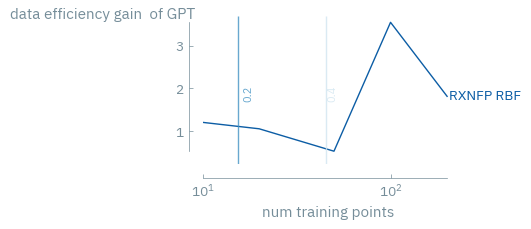

In [17]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(1, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))
ax.plot(grouped_extracted_res.loc[2, :, False].index, intersections, label="RXNFP RBF")

matplotx.line_labels()
add_kappa_vlines(
    grouped_extracted_res.loc[2, :, False].index,
    grouped_extracted_res.loc[2, :, False]["kappa"]["mean"],
    ymax=3.7,
)
ylabel_top("data efficiency gain  of GPT")
ax.set_xlabel("num training points", labelpad=4)

ax.set_xscale("log")

range_frame(ax, grouped_extracted_res.loc[2, :, False].index, np.array(intersections))
plt.savefig("rxndoyle-data-efficiency.pdf", bbox_inches="tight")

In [18]:
find_learning_curve_intersection(
    grouped_extracted_res.loc[2, :, False]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_drfp_rbf_res.loc[2, :].index,
        grouped_drfp_rbf_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/src/gptchem/evaluator.py:582: RuntimeWarning: overflow encountered in exp
  return -a * np.exp(-b * x) + c


2.9361630086316612

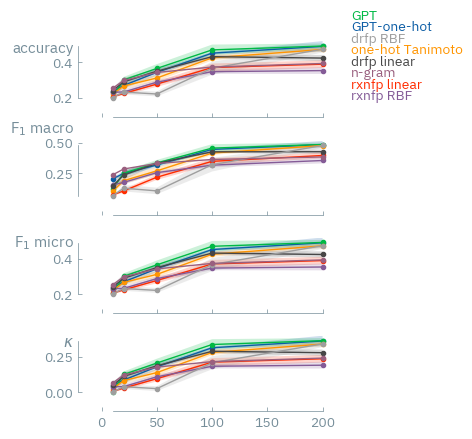

In [35]:
fig, ax = plt.subplots(
    4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
)

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_extracted_res.loc[5, :, True].index,
        grouped_extracted_res.loc[5, :, True][metric]["mean"],
        marker="o",
        label="GPT-one-hot",
    )
    ax[i].fill_between(
        grouped_extracted_res.loc[5, :, True].index,
        grouped_extracted_res.loc[5, :, True][metric]["mean"]
        - grouped_extracted_res.loc[5, :, True][metric]["sem"],
        grouped_extracted_res.loc[5, :, True][metric]["mean"]
        + grouped_extracted_res.loc[5, :, True][metric]["sem"],
        alpha=0.2,
    )

    range_frame(
        ax[i],
        grouped_extracted_res.loc[5, :, True].index,
        np.stack(
            [
                grouped_extracted_res.loc[5, :, True][metric]["mean"],
                grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"],
                grouped_rxnfp_linear_res.loc[5, :][metric]["mean"],
                grouped_drfp_linear_res.loc[5, :][metric]["mean"],
                grouped_drfp_rbf_res.loc[5, :][metric]["mean"],
            ]
        ).flatten(),
    )

    ax[i].plot(
        grouped_extracted_res.loc[5, :, False].index,
        grouped_extracted_res.loc[5, :, False][metric]["mean"],
        marker="o",
        label="GPT",
    )
    ax[i].fill_between(
        grouped_extracted_res.loc[5, :, False].index,
        grouped_extracted_res.loc[5, :, False][metric]["mean"]
        - grouped_extracted_res.loc[5, :, False][metric]["sem"],
        grouped_extracted_res.loc[5, :, False][metric]["mean"]
        + grouped_extracted_res.loc[5, :, False][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_ohe_tanimoto_res.loc[5, :].index,
        grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"],
        marker="o",
        label="one-hot Tanimoto",
    )
    ax[i].fill_between(
        grouped_ohe_tanimoto_res.loc[5, :].index,
        grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"]
        - grouped_ohe_tanimoto_res.loc[5, :][metric]["sem"],
        grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"]
        + grouped_ohe_tanimoto_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_linear_res.loc[5, :].index,
        grouped_rxnfp_linear_res.loc[5, :][metric]["mean"],
        marker="o",
        label="rxnfp linear",
    )
    ax[i].fill_between(
        grouped_rxnfp_linear_res.loc[5, :].index,
        grouped_rxnfp_linear_res.loc[5, :][metric]["mean"]
        - grouped_rxnfp_linear_res.loc[5, :][metric]["sem"],
        grouped_rxnfp_linear_res.loc[5, :][metric]["mean"]
        + grouped_rxnfp_linear_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_rxnfp_rbf_res.loc[5, :].index,
        grouped_rxnfp_rbf_res.loc[5, :][metric]["mean"],
        marker="o",
        label="rxnfp RBF",
    )
    ax[i].fill_between(
        grouped_rxnfp_rbf_res.loc[5, :].index,
        grouped_rxnfp_rbf_res.loc[5, :][metric]["mean"]
        - grouped_rxnfp_rbf_res.loc[5, :][metric]["sem"],
        grouped_rxnfp_rbf_res.loc[5, :][metric]["mean"]
        + grouped_rxnfp_rbf_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_drfp_linear_res.loc[5, :].index,
        grouped_drfp_linear_res.loc[5, :][metric]["mean"],
        marker="o",
        label="drfp linear",
    )
    ax[i].fill_between(
        grouped_drfp_linear_res.loc[5, :].index,
        grouped_drfp_linear_res.loc[5, :][metric]["mean"]
        - grouped_drfp_linear_res.loc[5, :][metric]["sem"],
        grouped_drfp_linear_res.loc[5, :][metric]["mean"]
        + grouped_drfp_linear_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_drfp_rbf_res.loc[5, :].index,
        grouped_drfp_rbf_res.loc[5, :][metric]["mean"],
        marker="o",
        label="drfp RBF",
    )
    ax[i].fill_between(
        grouped_drfp_rbf_res.loc[5, :].index,
        grouped_drfp_rbf_res.loc[5, :][metric]["mean"]
        - grouped_drfp_rbf_res.loc[5, :][metric]["sem"],
        grouped_drfp_rbf_res.loc[5, :][metric]["mean"]
        + grouped_drfp_rbf_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        ngram_grouped.loc['rxn', 5, :].index,
        ngram_grouped.loc['rxn', 5, :][metric]["mean"],
        marker="o",
        label="n-gram",
    )

matplotx.line_labels(ax[0])

ylabel_top("accuracy", ax=ax[0], x_pad=0.05)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], x_pad=0.05, y_pad=-0.01)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], x_pad=0.05)
ylabel_top(r"$\kappa$", ax=ax[3], x_pad=0.05)
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
fig.savefig("rxn-doyle-classification_results_5.pdf", bbox_inches="tight")

In [20]:
intersections = []

for i, val in enumerate(grouped_extracted_res.loc[5, :, False].index):
    factor = (
        find_learning_curve_intersection(
            grouped_extracted_res.loc[5, :, False]["f1_macro"]["mean"].values[i],
            fit_learning_curve(
                grouped_rxnfp_rbf_res.loc[5, :].index,
                grouped_rxnfp_rbf_res.loc[5, :]["f1_macro"]["mean"],
            )[0],
        )
        / val
    )

    intersections.append(factor)

/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/src/gptchem/evaluator.py:582: RuntimeWarning: overflow encountered in exp
  return -a * np.exp(-b * x) + c
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/src/gptchem/plotutils.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - pad * (x_max - x_min), x_max + pad * (x_max - x_min))


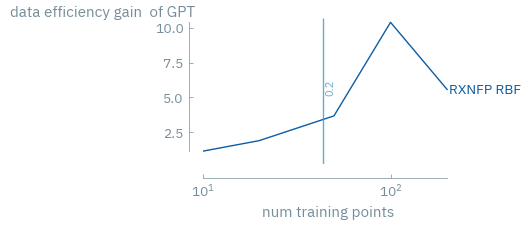

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))
ax.plot(grouped_extracted_res.loc[5, :, False].index, intersections, label="RXNFP RBF")

matplotx.line_labels()
add_kappa_vlines(
    grouped_extracted_res.loc[5, :, False].index,
    grouped_extracted_res.loc[5, :, False]["kappa"]["mean"],
    ymax=10.7,
)
ylabel_top("data efficiency gain  of GPT", y_pad=-0.1)
plt.xlabel("num training points", labelpad=4)

ax.set_xscale("log")
range_frame(ax, grouped_extracted_res.loc[2, :, False].index, np.array(intersections))
fig.savefig("rxndoyle-data-5-efficiency.pdf", bbox_inches="tight")